# Kenny Courser Fall 2022

In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
import matplotlib.pyplot as plt
import os, math
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix

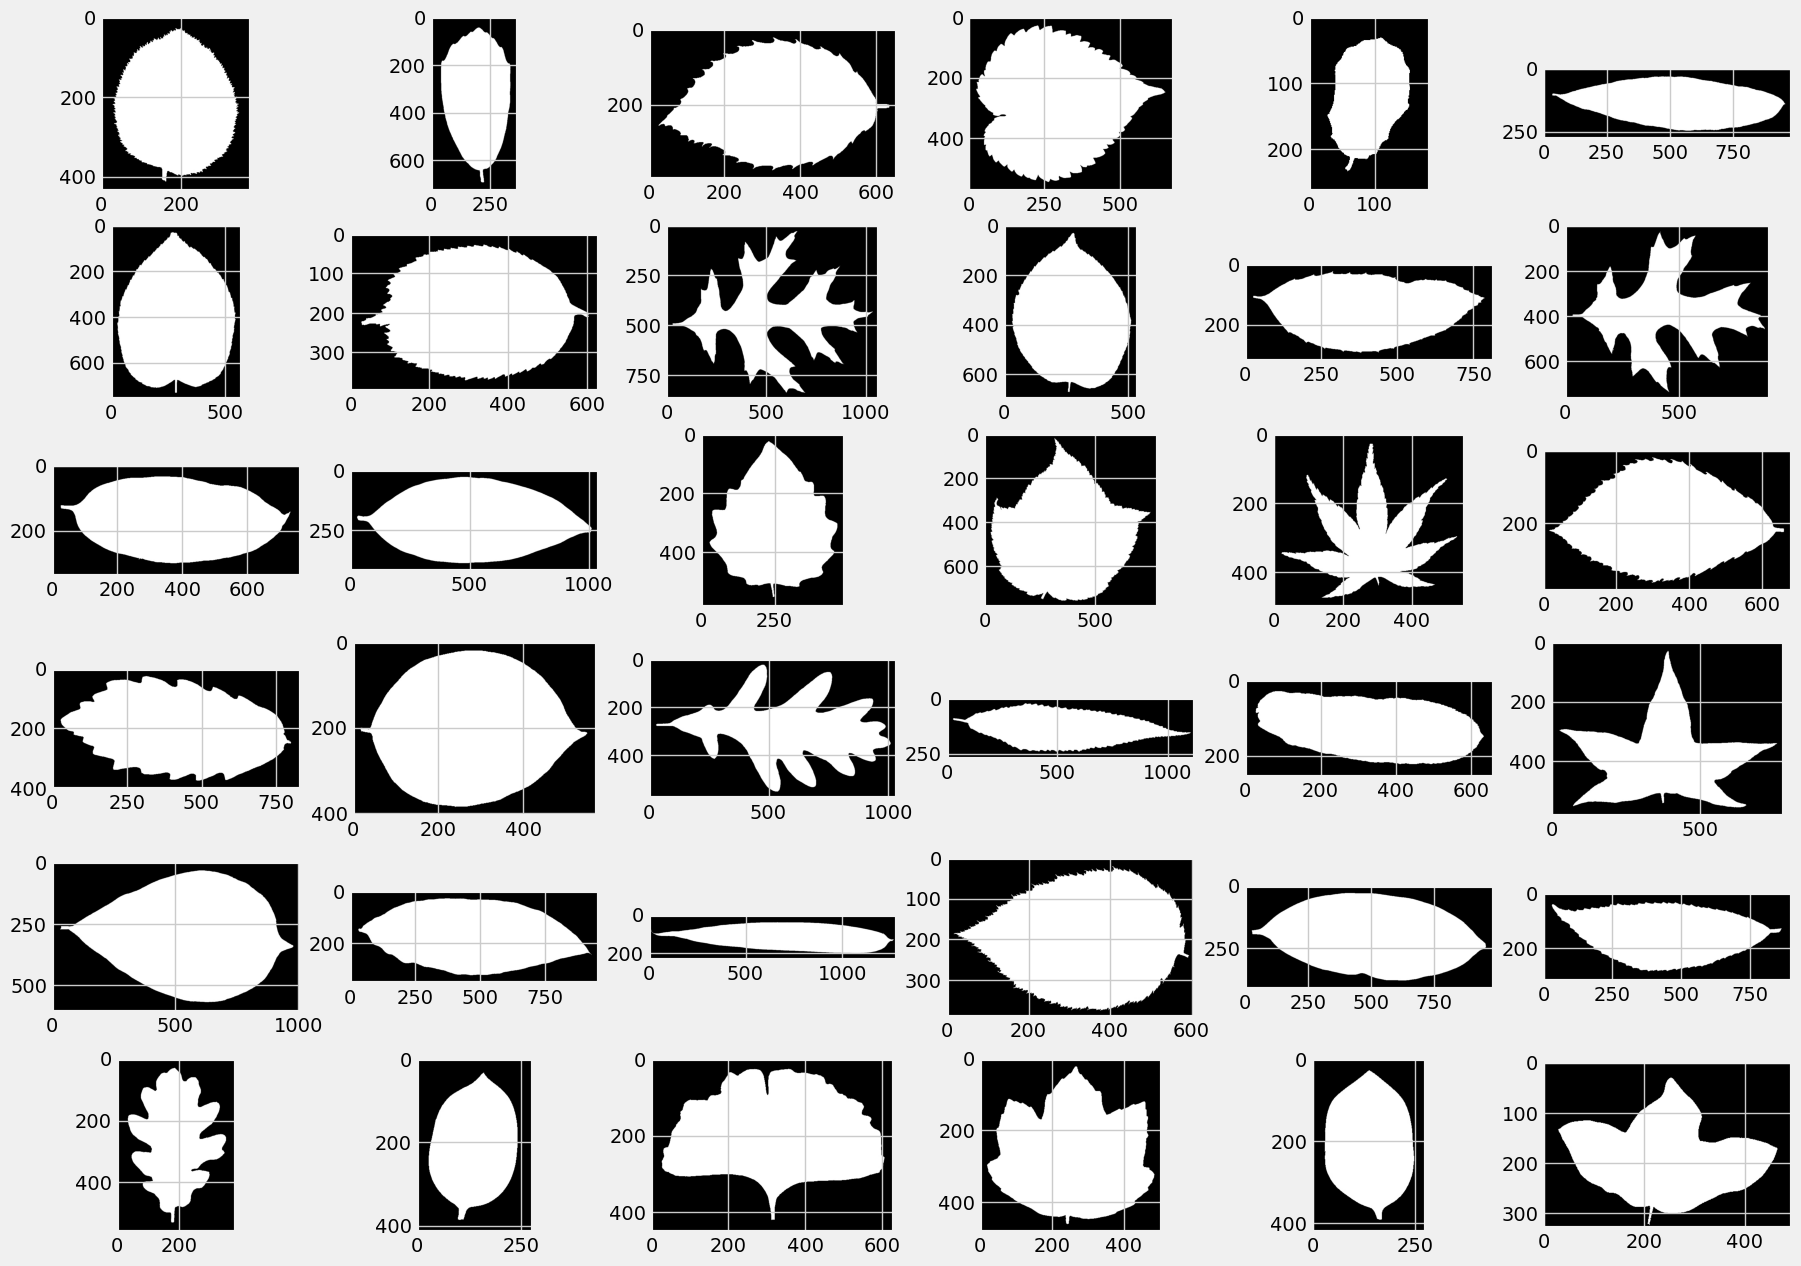

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from tensorflow.keras.utils import load_img
for i in range(36):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(6,6,i+1)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

In [62]:
LeafTrain = pd.read_csv('train.csv')
LeafTrain = LeafTrain.iloc[:, 1:]

LeafTest = pd.read_csv('test.csv')
LeafTest = LeafTest.iloc[:, 1:]

# Training data

In [63]:
LeafTrain

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


# Test/Validation data

In [64]:
LeafTest

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [65]:
len(LeafTrain.species.unique())

99

In [79]:
def create_data(LeafTrain):
    target = {k: v for k, v in zip(LeafTrain.species.unique(), list(range(len(LeafTrain.species.unique()))))}
    X = np.array(LeafTrain.drop(['species'], axis=1))
    y = np.asarray(LeafTrain['species'].map(target)).astype('int64')
    
    X = tf.cast(X, tf.float64)
    y = tf.cast(y, tf.int64)
    return X, y


X, y = create_data(LeafTrain)

In [67]:
print(X.shape, y.shape)

(990, 192) (990,)


In [96]:
def GaussianErrorLinearUnit(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.04 * (x ** 3))))
    return res


class ResidualMLPBlock(tf.keras.layers.Layer):
    def __init__(self, units, residual_path):
        super(ResidualMLPBlock, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation='relu')
        self.D2 = Dense(units, activation='relu')

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GaussianErrorLinearUnit(residual)
            residual = self.D4(residual)
            residual = GaussianErrorLinearUnit(residual)

        output = y + residual
        return output

In [97]:
class ResidualMultiLayerPerceptron(tf.keras.Model):
    def __init__(self, initial_filters, block_list, num_classes):
        super(ResidualMultiLayerPerceptron, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='relu')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResidualMLPBlock(units=self.initial_filters, residual_path=True)
                else:
                    block = ResidualMLPBlock(units=self.initial_filters, residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2
        self.D2 = Dense(num_classes, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

In [115]:
net = ResidualMultiLayerPerceptron(initial_filters=256, block_list=[2, 2, 2], num_classes=99)

net.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['sparse_categorical_accuracy'])

history = net.fit(X, y, epochs=100, batch_size=64, validation_split=0.3)

net.summary()

Epoch 1/100
11/11 [==============================] - 3s 87ms/step - loss: 4.0166 - sparse_categorical_accuracy: 0.1544 - val_loss: 4.5055 - val_sparse_categorical_accuracy: 0.1481
Epoch 2/100
11/11 [==============================] - 0s 45ms/step - loss: 1.6298 - sparse_categorical_accuracy: 0.5541 - val_loss: 4.3546 - val_sparse_categorical_accuracy: 0.3266
Epoch 3/100
11/11 [==============================] - 0s 44ms/step - loss: 0.7405 - sparse_categorical_accuracy: 0.7908 - val_loss: 4.2868 - val_sparse_categorical_accuracy: 0.2155
Epoch 4/100
11/11 [==============================] - 1s 46ms/step - loss: 0.4354 - sparse_categorical_accuracy: 0.8687 - val_loss: 4.2231 - val_sparse_categorical_accuracy: 0.3300
Epoch 5/100
11/11 [==============================] - 0s 44ms/step - loss: 0.2093 - sparse_categorical_accuracy: 0.9293 - val_loss: 4.1038 - val_sparse_categorical_accuracy: 0.5556
Epoch 6/100
11/11 [==============================] - 1s 47ms/step - loss: 0.1365 - sparse_categorica

Epoch 46/100
11/11 [==============================] - 1s 48ms/step - loss: 3.4140e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4422 - val_sparse_categorical_accuracy: 0.9192
Epoch 47/100
11/11 [==============================] - 0s 46ms/step - loss: 2.6732e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4109 - val_sparse_categorical_accuracy: 0.9192
Epoch 48/100
11/11 [==============================] - 1s 47ms/step - loss: 3.0046e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3852 - val_sparse_categorical_accuracy: 0.9192
Epoch 49/100
11/11 [==============================] - 1s 48ms/step - loss: 2.7157e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3645 - val_sparse_categorical_accuracy: 0.9192
Epoch 50/100
11/11 [==============================] - 1s 46ms/step - loss: 2.6566e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3481 - val_sparse_categorical_accuracy: 0.9192
Epoch 51/100
11/11 [==============================] - 0s 45ms/step - loss: 

In [87]:
LeafSub = pd.read_csv('sub.csv')

In [120]:
X_test = np.array(LeafTest)
y_pred = net.predict(X_test)

19/19 [==============================] - 0s 7ms/step


In [38]:
print(X_test.shape, y_pred.shape)

(594, 192) (594, 99)


In [121]:
LeafNew = pd.DataFrame(y_pred, columns=LeafSub.columns.tolist()[1:])

In [122]:
LeafMerge = pd.concat([LeafSub['id'], LeafNew], axis=1)
LeafMerge

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,8.406509e-11,2.902714e-18,1.056534e-15,2.563298e-18,1.183031e-11,3.872239e-15,3.916951e-18,7.106606e-17,2.279028e-17,...,6.361197e-15,5.985267e-20,9.425680e-14,1.696940e-18,8.623730e-17,1.165526e-15,1.732194e-16,2.385697e-13,6.835996e-18,1.501784e-17
1,7,3.403564e-07,4.868703e-11,1.095004e-08,3.413133e-09,2.092757e-11,1.065917e-09,1.286814e-11,1.753633e-07,8.578836e-08,...,4.996797e-07,3.712008e-09,5.407605e-07,3.971946e-11,4.453569e-09,1.325239e-10,2.767137e-12,8.094753e-11,1.380671e-11,1.949144e-10
2,9,1.790111e-12,7.036678e-11,1.646993e-08,7.780907e-14,2.303244e-11,3.124721e-05,5.411512e-11,6.584251e-07,3.328097e-11,...,8.562874e-09,2.979954e-11,3.754316e-09,1.512740e-09,3.442419e-07,6.470244e-09,9.659443e-10,1.301016e-08,9.811241e-13,9.372928e-08
3,12,1.126502e-09,7.467153e-11,6.094489e-11,7.138549e-08,8.916216e-09,1.409663e-09,1.717824e-10,2.034949e-07,1.262548e-07,...,2.681656e-07,4.679919e-10,1.151257e-06,4.517318e-06,9.996400e-01,3.515712e-05,1.018540e-08,5.652798e-09,1.031705e-10,1.020664e-06
4,13,3.260395e-15,7.318703e-10,1.997422e-16,5.999078e-09,1.925296e-16,1.167175e-12,5.828401e-15,1.072949e-09,4.329530e-16,...,4.721197e-12,3.664694e-17,7.458451e-11,1.376015e-10,3.100528e-11,1.811671e-11,7.665515e-11,1.652390e-13,7.225346e-13,7.223245e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,5.973369e-12,2.151906e-10,2.444756e-08,2.767264e-13,2.075679e-10,2.367166e-05,6.555724e-11,1.431710e-07,4.484349e-11,...,3.658682e-09,1.539329e-11,1.303002e-08,1.774397e-09,4.935934e-08,3.809280e-08,1.085462e-09,2.602980e-08,6.858327e-13,2.478883e-08
590,1577,5.770713e-12,1.564836e-14,1.474937e-13,2.419931e-12,3.777831e-17,4.557252e-15,3.311352e-16,7.029144e-16,2.679281e-10,...,4.059673e-14,1.734562e-14,1.090183e-14,3.041793e-12,1.963239e-10,6.483066e-12,1.110080e-10,4.708843e-15,8.990305e-17,1.750601e-08
591,1579,4.758926e-15,8.660177e-11,6.924341e-08,6.800636e-16,7.210301e-16,8.436481e-13,9.999940e-01,1.946965e-13,6.610465e-12,...,1.825254e-14,2.566442e-10,8.061032e-15,2.932492e-16,6.361516e-12,3.169698e-12,3.879360e-12,1.392439e-13,1.063974e-08,1.223599e-12
592,1580,2.299478e-18,4.030115e-15,9.518349e-19,2.513134e-17,1.329816e-17,1.705786e-17,2.277668e-20,2.576955e-13,9.333018e-23,...,2.125396e-14,1.973569e-16,2.583683e-13,7.308429e-16,7.952973e-18,1.966635e-20,2.427003e-16,8.556455e-16,1.852954e-11,1.322611e-18


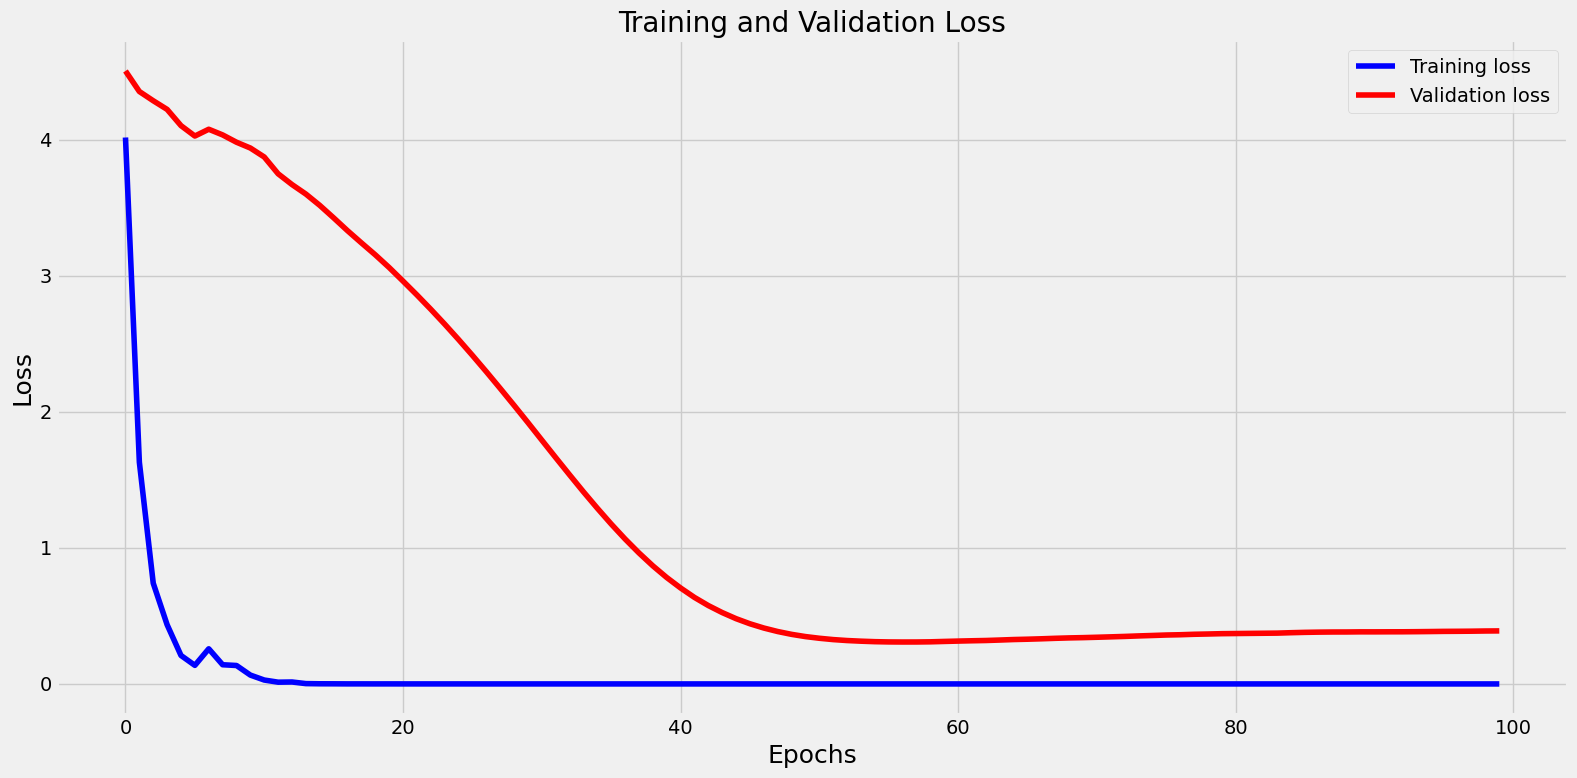

In [123]:
def plot_auc_acc_loss(history, epochs):
    tloss = history.history['loss']

    vloss = history.history['val_loss']

    Epochs = [i for i in range(epochs)]

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
    axes.plot(Epochs, tloss, 'b', label='Training loss')
    axes.plot(Epochs, vloss, 'r', label='Validation loss')
    axes.set_title('Training and Validation Loss')
    axes.set_xlabel('Epochs', fontsize=18)
    axes.set_ylabel('Loss', fontsize=18)
    axes.legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_acc_loss(history, epochs=100)

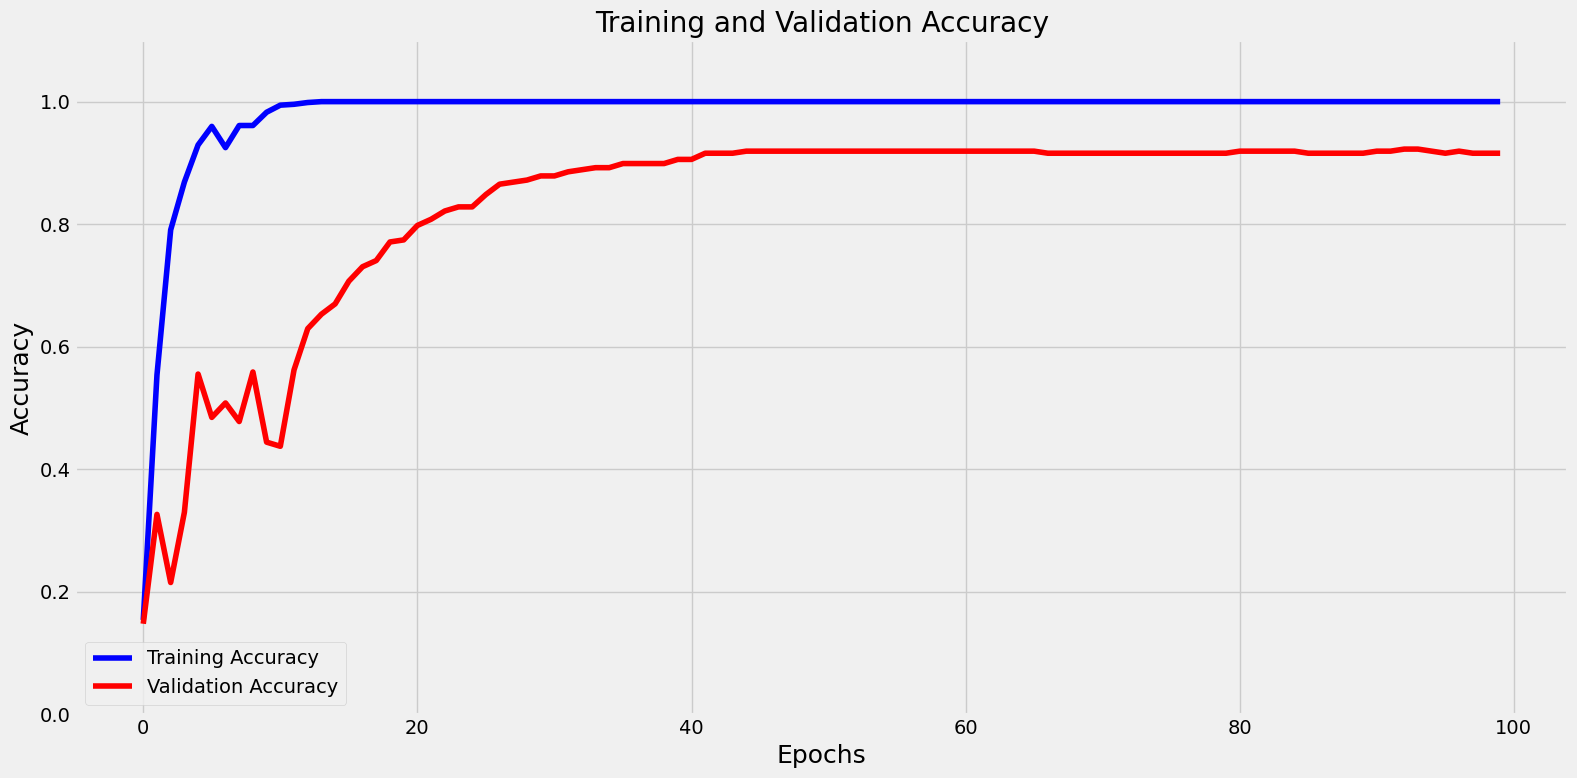

In [124]:
def plot_auc_acc_loss(history, epochs):
    tacc = history.history['sparse_categorical_accuracy']

    vacc = history.history['val_sparse_categorical_accuracy']

    Epochs = [i for i in range(epochs)]

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

    axes.plot(Epochs, tacc, 'b', label='Training Accuracy')
    axes.plot(Epochs, vacc, 'r', label='Validation Accuracy')
    axes.set_ylim(0, 1.1)
    axes.set_title('Training and Validation Accuracy')
    axes.set_xlabel('Epochs', fontsize=18)
    axes.set_ylabel('Accuracy', fontsize=18)
    axes.legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_acc_loss(history, epochs=100)

In [125]:
net.evaluate(X,y)

31/31 [==============================] - 0s 9ms/step - loss: 0.1169 - sparse_categorical_accuracy: 0.9747


[0.1169416606426239, 0.9747474789619446]